<div align="center">
    <h1> Regression </h1>
</div>

In this notebook, I will implement basic regression algorithms from scratch.

## Table of Content
1. [Linear Regression](#linear-regression)
2. [Polynomial Regression](#polynomial-regression)
3. [Ridge Regression (L2 Regularization)](#ridge-regression-(l2-regularization))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

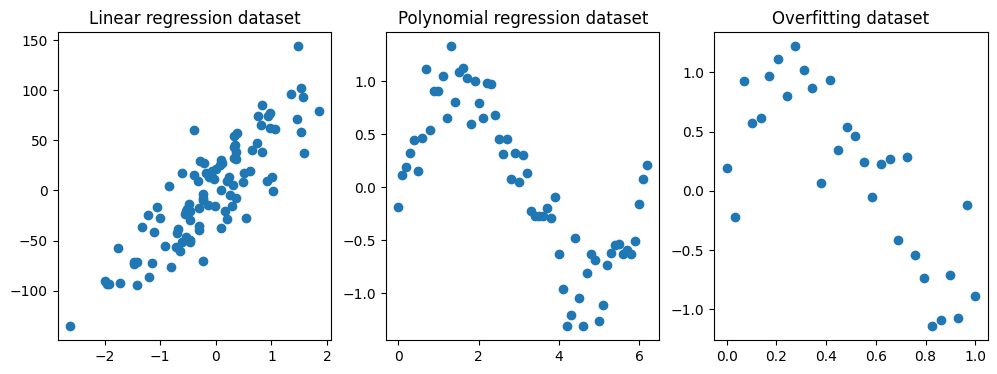

In [2]:
# Generate datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

noise = 0.2
X_poly = np.arange(0, 2*np.pi, 0.1).reshape(-1, 1)
y_poly = np.sin(X_poly) + np.random.normal(0, noise, X_poly.shape)

noise = 0.3
X_overfit = np.linspace(0, 1, 30).reshape(-1, 1)
y_overfit = np.array([np.sin(5 * x) for x in X_overfit]).reshape(-1, 1) + np.random.normal(0, noise, (30, 1))


# Plot datasets
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.scatter(X, y)
ax1.set_title('Linear regression dataset')

ax2.scatter(X_poly, y_poly)
ax2.set_title('Polynomial regression dataset')

ax3.scatter(X_overfit, y_overfit)
ax3.set_title('Overfitting dataset')

plt.show()
plt.close()


# Linear Regression

* Least Square Method
    * We consider the linear model $y = m \cdot x + b$.
    $$ m = \frac{n \cdot \sum(xy) - \sum(x) \cdot \sum(y)}{n \cdot \sum(x^2) - (\sum(x))^2} $$
    $$ b = \frac{\sum(y) - m \cdot \sum(x)}{n} $$
    where $n$ is the number of data points.

{'slope': np.float64(49.829309347009136), 'intercept': np.float64(3.4953459615809197)}


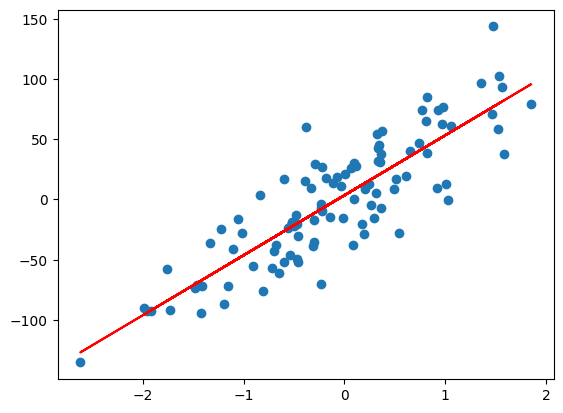

In [131]:
def least_squares(X, y):
    N = X.shape[0]
    m = N * np.sum(X.T * y) - np.sum(X) * np.sum(y)
    m /= N * np.sum(X**2) - np.sum(X)**2

    b = np.sum(y) - m * np.sum(X)
    b /= N

    return m, b

# Predict
m, b = least_squares(X, y)
print({'slope': m, 'intercept': b})

# Plot
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()
plt.close()

* Ordinary Least Square Method
    * We consider the linear model $y = X \cdot \beta + \epsilon$. Here, $X$ is the design matrix and $\beta$ is the parameter vector.
    * The objective is to minimize the sum of squared errors.
    $$ \hat{\beta} = (X^T X)^{-1} X^T y $$

Estimated beta: [49.39056071]


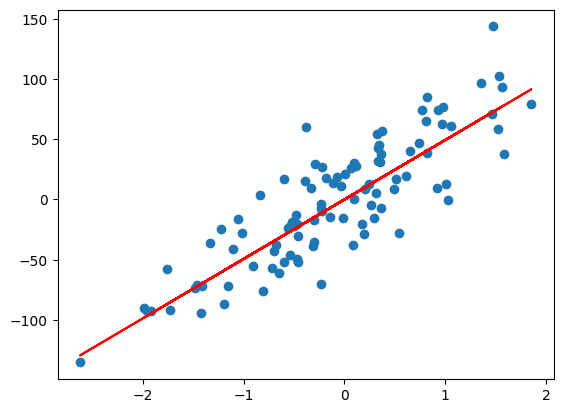

In [ ]:
def ordinary_least_square(X, y):
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

# Predict
beta_hat = ordinary_least_square(X, y)
print(f'Estimated beta: {beta_hat}')

# Plot
plt.scatter(X, y)
plt.plot(X, X @ beta_hat, color='red')
plt.show()
plt.close()

## Polynomial Regression

* We consider the polynomial model $y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2 + \cdots + \beta_n \cdot x^n + \epsilon$.

* To fit the model, we solve for $ \boldsymbol{\beta} $ using the **Ordinary Least Squares (OLS)** solution:
$$
\boldsymbol{\beta} = (X^T X)^{-1} X^T y
$$


numpy values : [[-0.00057364  0.00696593 -0.01729451]]
polynomial_regression values : [[-0.00057364  0.00696593 -0.01729451]]


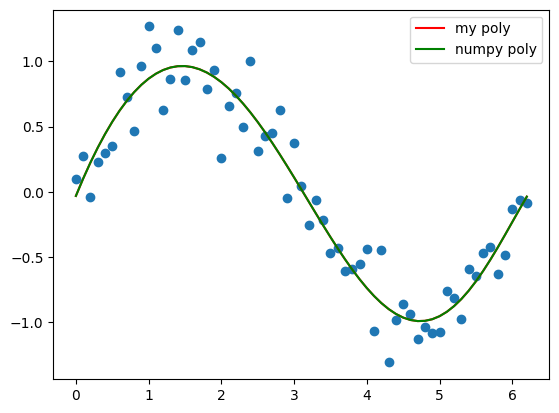

In [130]:
def polynomial_regression(X, y, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    beta_hat = ordinary_least_square(X_poly, y)
    return beta_hat, X_poly

# Predict
degree = 6
beta_hat, X_poly_hat = polynomial_regression(X_poly, y_poly, degree)
numpy_poly = np.polyfit(X_poly[:, 0], y_poly, degree)

print(f'numpy values : {numpy_poly[:3].T}')
print(f'polynomial_regression values : {np.flip(beta_hat)[:3].T}')

# Plot
plt.scatter(X_poly, y_poly)
plt.plot(X_poly, X_poly_hat @ beta_hat, color='red', label='my poly')
plt.plot(X_poly, np.polyval(numpy_poly, X_poly[:, 0]), color='green', label='numpy poly')
plt.legend()
plt.show()
plt.close()

## Ridge Regression (L2 Regularization)

Ridge Regression is a *linear regression* model with a regularization term that penalizes large coefficients. The main advantage of Ridge Regression is that it reduces overfitting by shrinking the regression coefficients toward zero.

### Problem Formulation

Given a dataset $ X \in \mathbb{R}^{n \times p} $ and response variable $ y \in \mathbb{R}^{n} $, the ridge regression objective function is:

$$
\hat{\beta}_{\text{Ridge}} = \arg\min_{\beta} \|y - X\beta\|^2_2 + \lambda\|\beta\|^2_2
$$

Where $\lambda > 0$ is the regularization parameter that controls the amount of shrinkage.

Ridge regression addresses issues of multicollinearity and near-singular matrices $ X^T X $ by adding a positive constant $ \lambda I $ to the diagonal, improving the condition number. The closed-form solution is:

$$
\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y
$$

As $\lambda$ increases, the bias of the ridge regression estimator increases while its variance decreases, creating a bias-variance trade-off that can lead to better predictive performance compared to ordinary least squares.

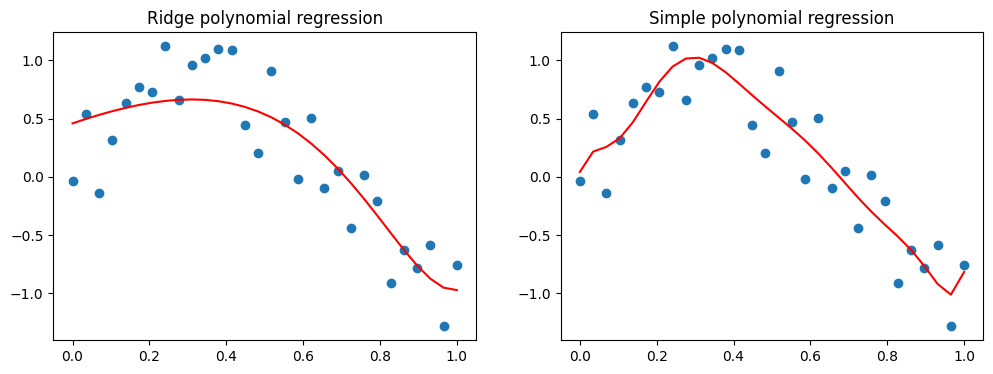

In [138]:
def ridge_regression(X, y, alpha):
    beta_hat = np.linalg.inv(X.T @ X + alpha * np.eye(X.shape[1])) @ X.T @ y
    return beta_hat

def polynomial_ridge_regression(X, y, alpha, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    beta_hat = ridge_regression(X_poly, y, alpha)
    return beta_hat, X_poly

# Predict
degree = 10
alpha = 0.1

beta_hat, X_overfit_hat = polynomial_ridge_regression(X_overfit, y_overfit, alpha, degree)

alpha = 0
beta_hat_simple, X_overfit_hat_simple = polynomial_regression(X_overfit, y_overfit, degree)

# Plot
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X_overfit, y_overfit)
ax1.plot(X_overfit, X_overfit_hat @ beta_hat, color='red')
ax1.set_title('Ridge polynomial regression')

ax2.scatter(X_overfit, y_overfit)
ax2.plot(X_overfit, X_overfit_hat_simple @ beta_hat_simple, color='red')
ax2.set_title('Simple polynomial regression')

plt.show()
plt.close()

## Lasso Regression (L1 Regularization)

https://math.stackexchange.com/questions/471339/derivation-of-soft-thresholding-operator-proximal-operator-of-l-1-norm

https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/coord-desc.pdf

https://scikit-learn.org/stable/modules/linear_model.html#lasso

Estimated betta: [49.384517]
Estimated betta: [49.21695612]


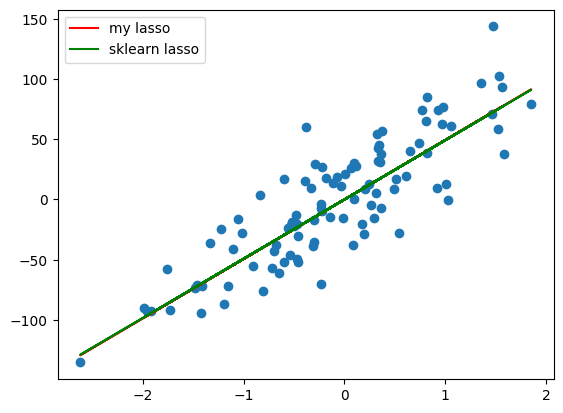

In [ ]:
def soft_treshold(z, alpha):
    return np.sign(z) * np.max(np.abs(z) - alpha, 0)


def lasso_regression(X, y, alpha=0.01, max_iter=1000, epsilon=10e-6):
    beta_hat = np.zeros(X.shape[1])

    for _ in range(max_iter):
        prev_beta = beta_hat.copy()

        for j in range(X.shape[1]):

            rezidual = y - X @ beta_hat + X[:, j] * beta_hat[j]
            w = X.T @ X

            beta_hat[j] = soft_treshold(X[:, j].T @ rezidual, alpha) / w[j, j]

        if np.linalg.norm(prev_beta - beta_hat) < epsilon:
            break

    return beta_hat

alpha = 0.5

beta_hat = lasso_regression(X, y, alpha)
print(f'Estimated betta: {beta_hat}')

from sklearn.linear_model import Lasso

lasso = Lasso(alpha)

lasso.fit(X, y)
print(f'Estimated betta: {lasso.coef_}')


plt.scatter(X, y)
plt.plot(X, X @ beta_hat, color='red', label='my lasso')
plt.plot(X, X @ lasso.coef_, color='green', label='sklearn lasso')
plt.legend()
plt.show()
plt.close()

## Decision Tree Regression

In [ ]:
def decision_tree_regression():
    pass

- Decision Tree Regression
- Random Forest Regression
- SVM Regression
- Metrics